In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import cm

In [2]:
TRAIN_RESULTS = './train_results/'

In [3]:
title = pickle.load(open(TRAIN_RESULTS + 'title.p', 'rb'))
params = pickle.load(open(TRAIN_RESULTS + 'params.p', 'rb'))
avg = pickle.load(open(TRAIN_RESULTS + 'avg.p', 'rb'))
desc = pickle.load(open(TRAIN_RESULTS + 'desc.p', 'rb'))
history = pickle.load(open(TRAIN_RESULTS + 'history.p', 'rb'))
conf_mat = pickle.load(open(TRAIN_RESULTS + 'conf_mat.p', 'rb'))

In [5]:
def reshape_history(history, key="val_accuracy"):
    new_hist = []
    for model_hist in history:
        new_hist.append([])
        for hist in model_hist:
            new_hist[-1].append(hist[key])
    return new_hist

In [6]:
def plot_avg_of_model(history, title, key="val_accuracy", params=[], models=[], series_size=[]):

    colors_n = len(models)*len(series_size)
    if colors_n==0:
        colors_n = len(history)

    fig, ax = plt.subplots(1,1, figsize=(12, 6), constrained_layout=True)
    fig.suptitle("Average "+ key, fontsize=16)
    mycmap = cm.get_cmap('viridis', colors_n)

    key_history = reshape_history(history, key)
    i_color = 0
    for i, his in enumerate(key_history):
        if (not models or params[i][0] in models) and (not series_size  or params[i][1] in series_size):
            name = title[i]
            avg = np.average(his, axis=0)
            ax.plot(avg, color=mycmap.colors[i_color], label=name)
            i_color+=1
    legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True)
    ax.set_title(key)
    ax.set_xlabel('epoch')
    ax.set_ylabel(key)

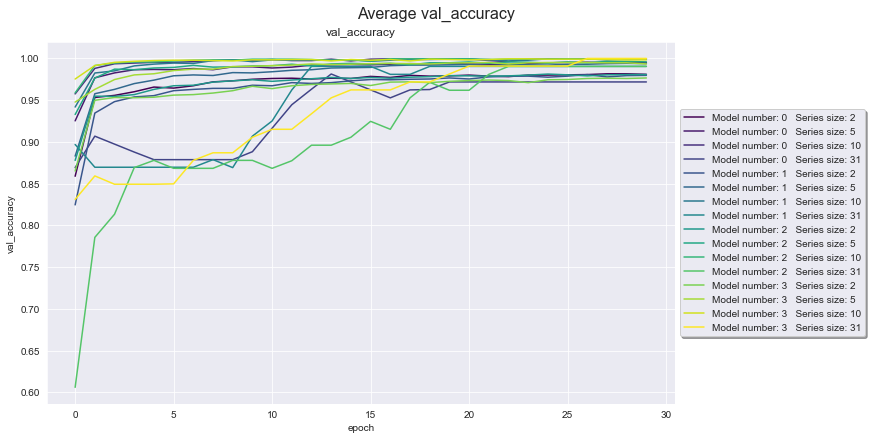

In [7]:
plot_avg_of_model(history, title, "val_accuracy")

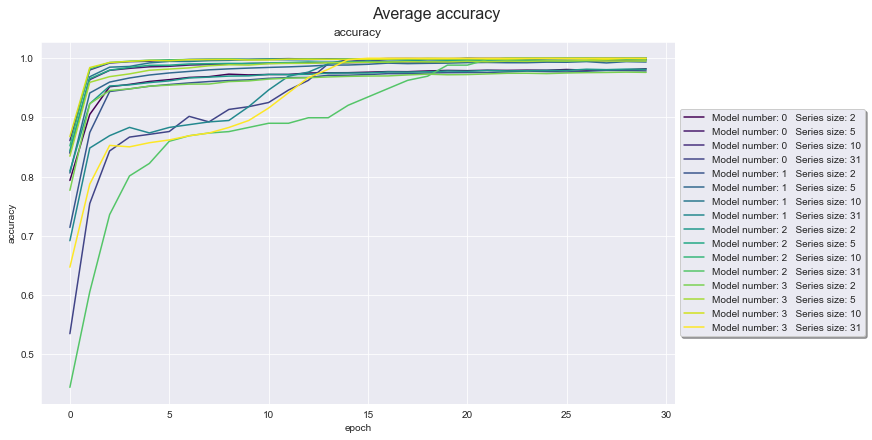

In [14]:
plot_avg_of_model(history, title, "accuracy")

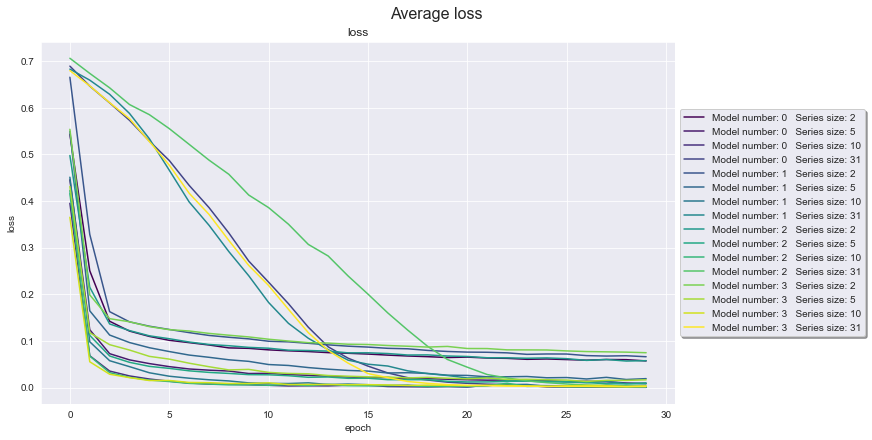

In [15]:
plot_avg_of_model(history, title, "loss")

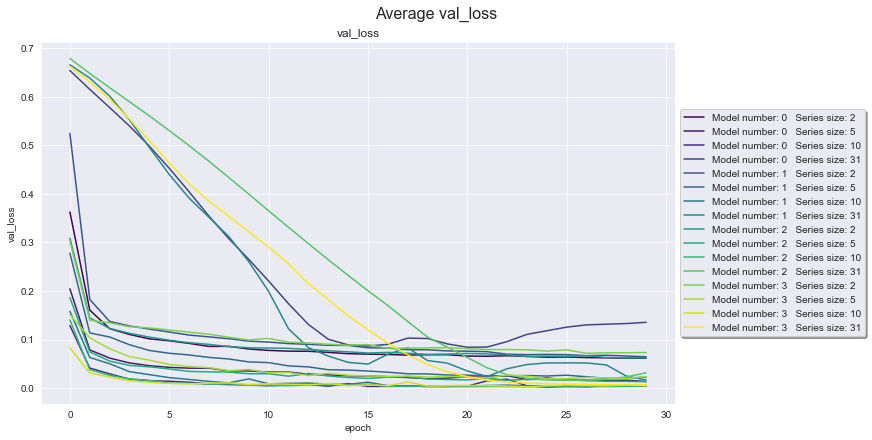

In [16]:
plot_avg_of_model(history, title, "val_loss")

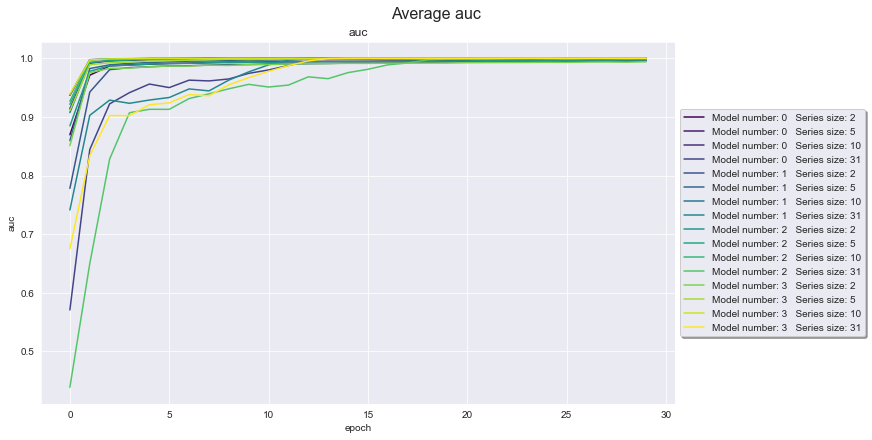

In [18]:
plot_avg_of_model(history, title, "auc")

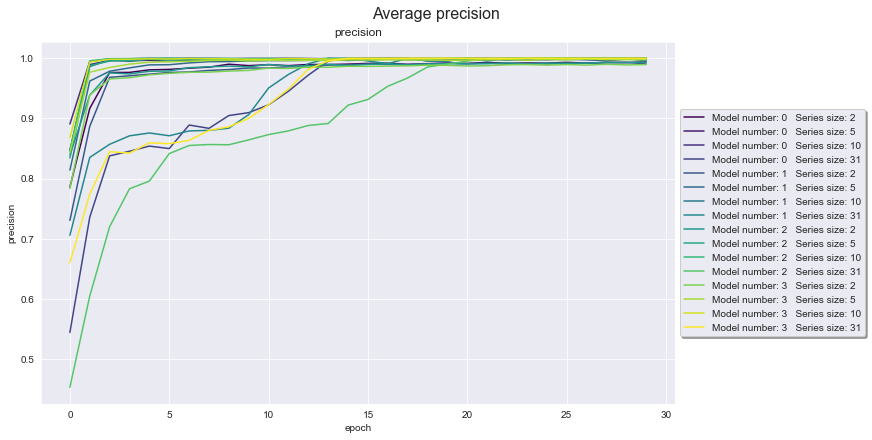

In [19]:
plot_avg_of_model(history, title, "precision")

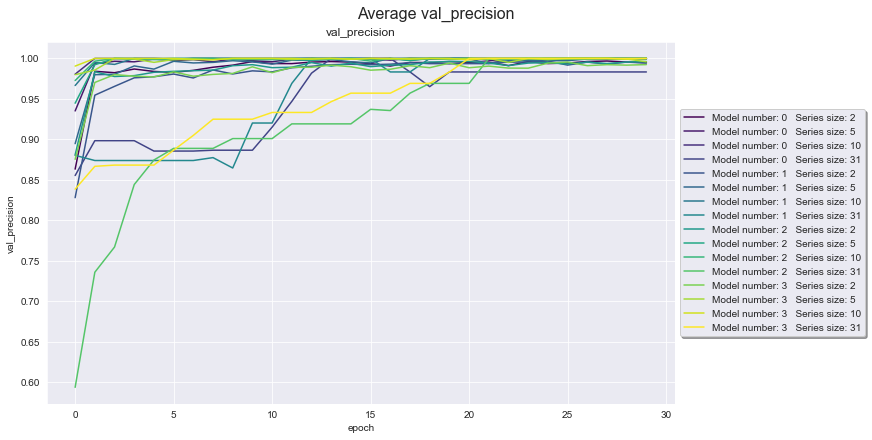

In [20]:
plot_avg_of_model(history, title, "val_precision")

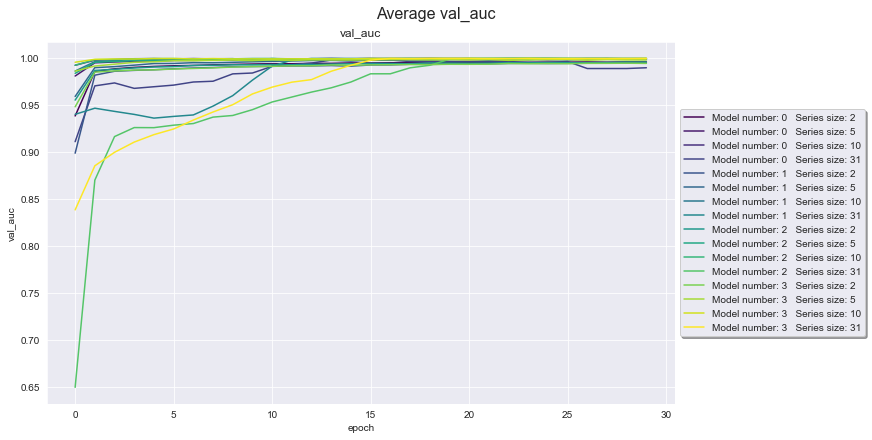

In [21]:
plot_avg_of_model(history, title, "val_auc")

In [ ]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[0,1,2,3], series_size=[2])

In [ ]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[0,1,2,3], series_size=[5])

In [ ]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[0,1,2,3], series_size=[10])

In [ ]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[0,1,2,3], series_size=[31])

In [22]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[0], series_size=[2,5,10,31])

In [25]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[1], series_size=[2,5,10,31])

In [23]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[2], series_size=[2,5,10,31])

In [24]:
for key in history[0][0].keys():
    plot_avg_of_model(history, title, key, params, models=[3], series_size=[2,5,10,31])

In [26]:
def plot_avg_conf_matrix(conf_mat,title):
    for i, mat in enumerate(conf_mat):
        matrix = np.array(mat).sum(axis=0)

        sns.heatmap(matrix, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
        plt.suptitle("Confusion matrix   "+ title[i], fontsize=16)
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values')
        plt.show()

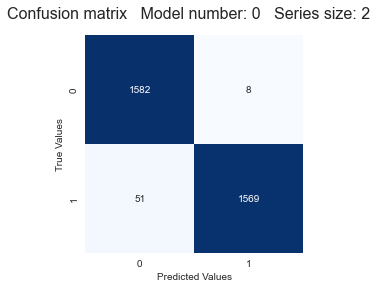

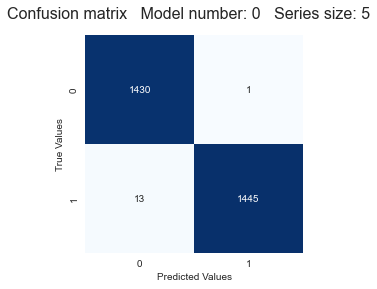

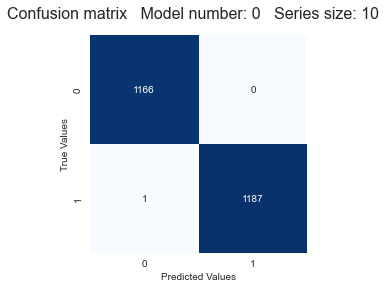

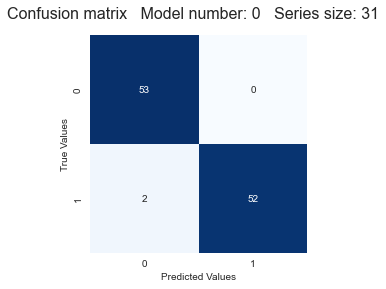

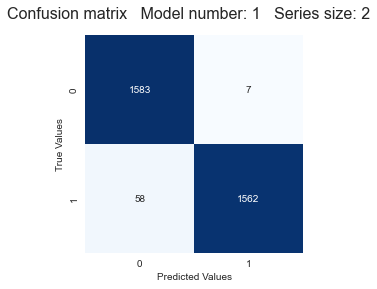

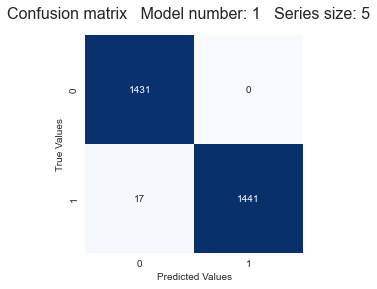

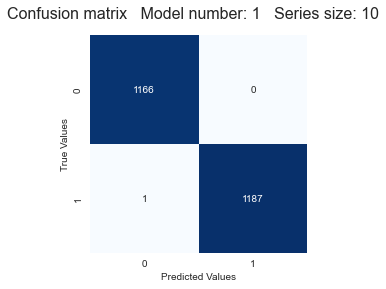

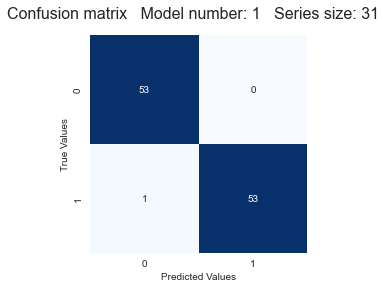

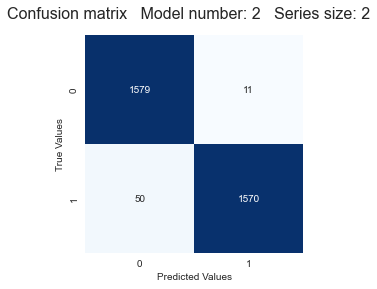

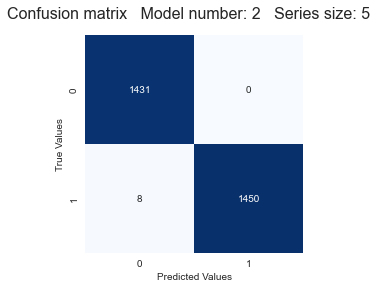

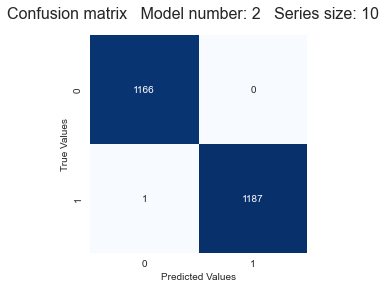

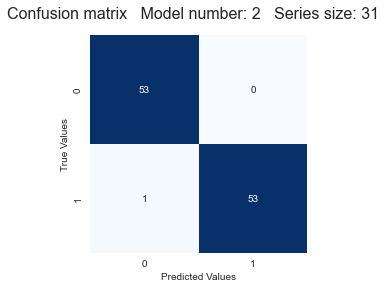

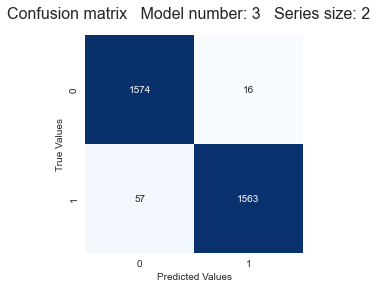

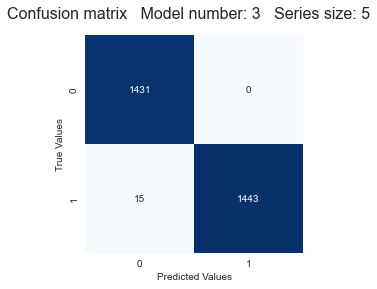

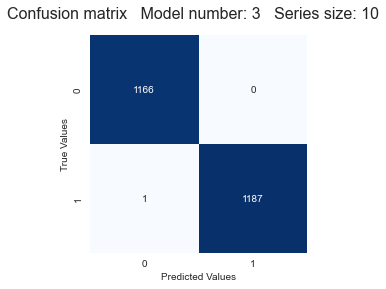

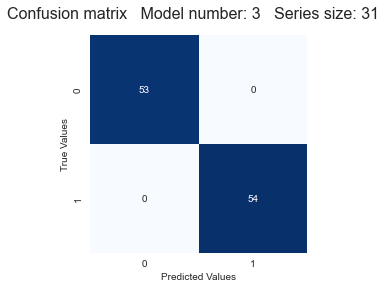

In [27]:
plot_avg_conf_matrix(conf_mat,title)

In [28]:
def print_history_of_model(history, desc, title, key="val_accuracy"):
    fig, ax = plt.subplots(1,1, figsize=(12, 6), constrained_layout=True)
    fig.suptitle(title, fontsize=16)
    mycmap = cm.get_cmap("viridis", len(history))

    for i, his in enumerate(history):
        name = desc[i] #"Model "+str(i+1)
        ax.plot(his[key], color=mycmap.colors[i], label=name)
    legend = ax.legend(loc='best', shadow=True)
    ax.set_title(key)
    ax.set_xlabel('epoch')
    ax.set_ylabel(key)

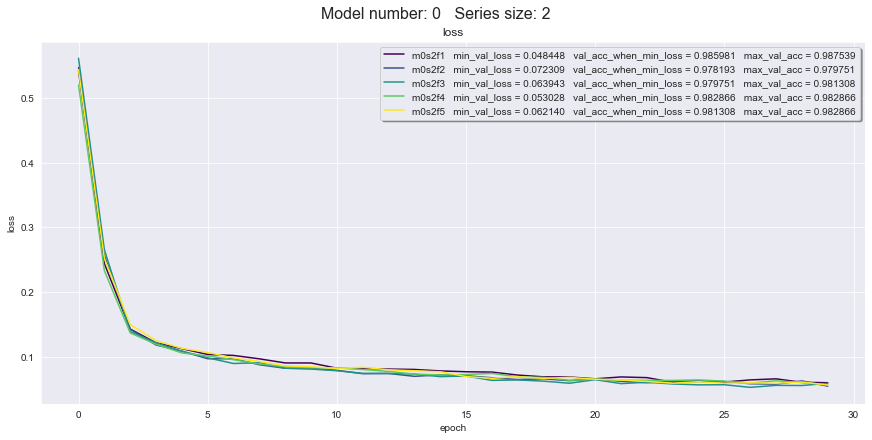

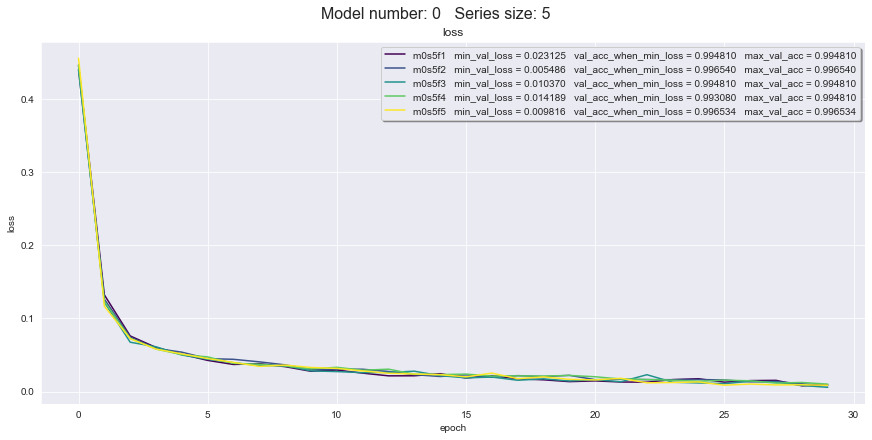

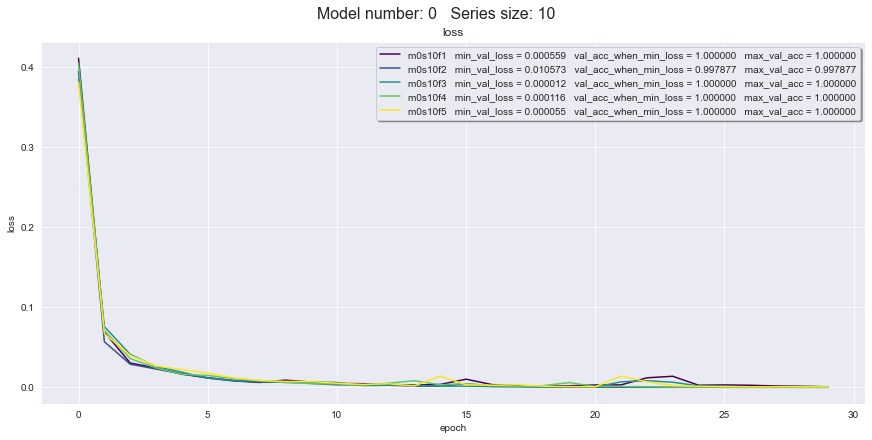

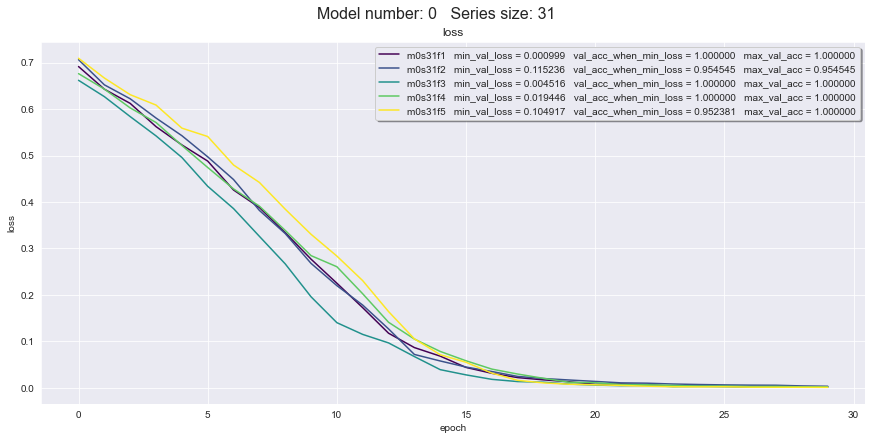

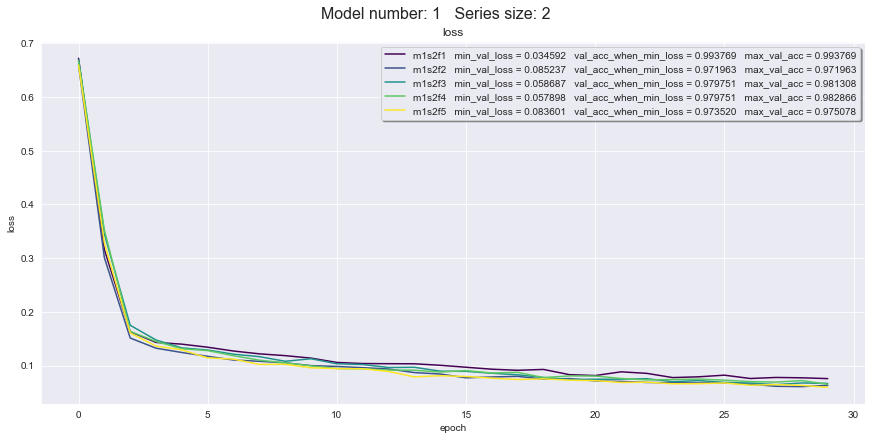

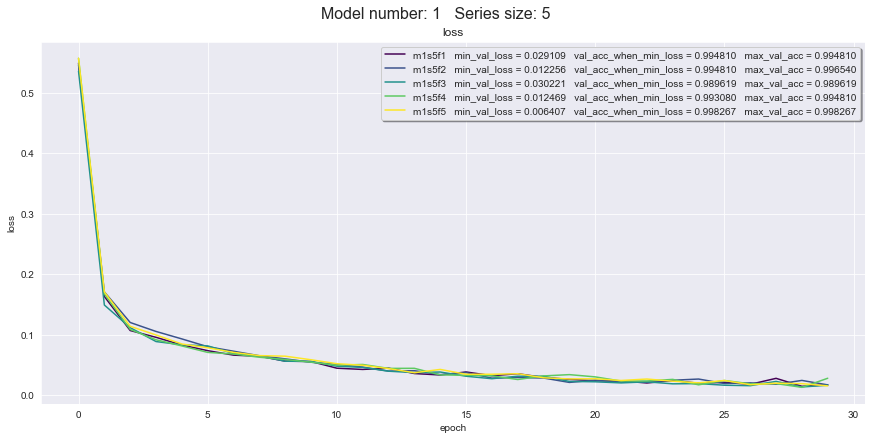

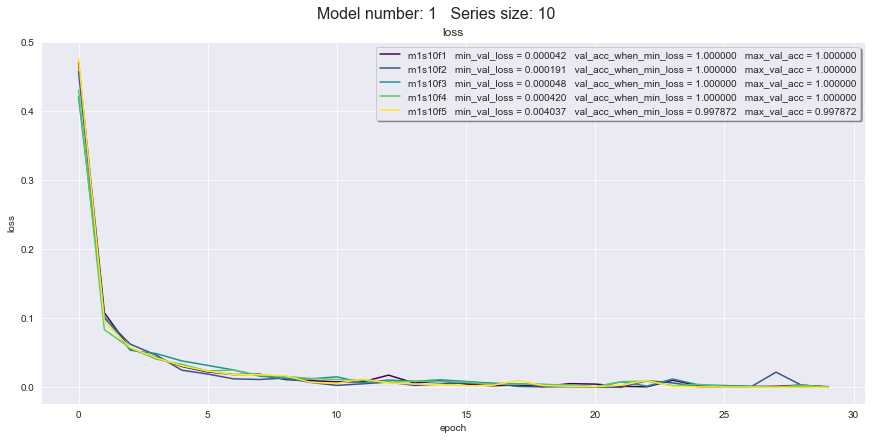

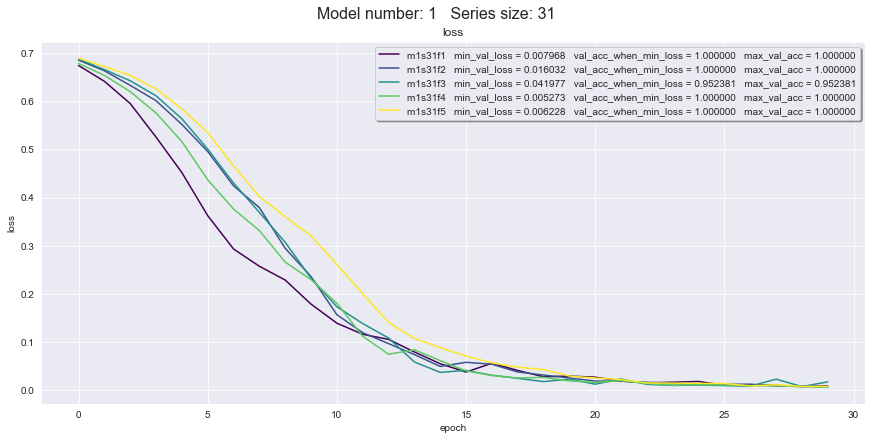

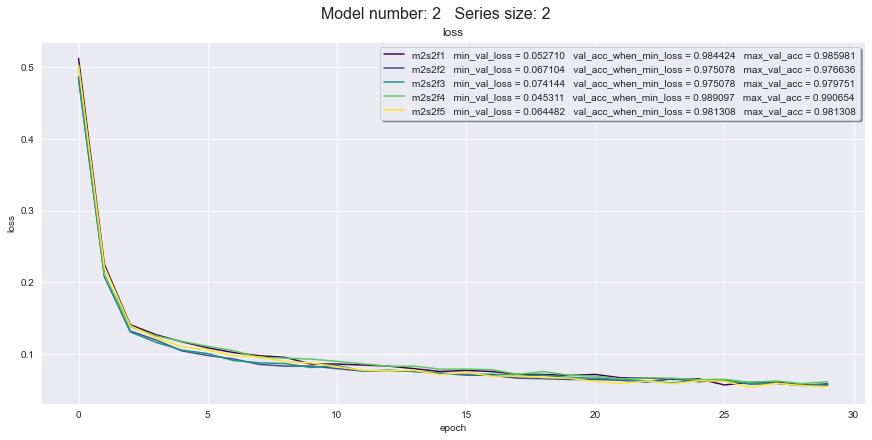

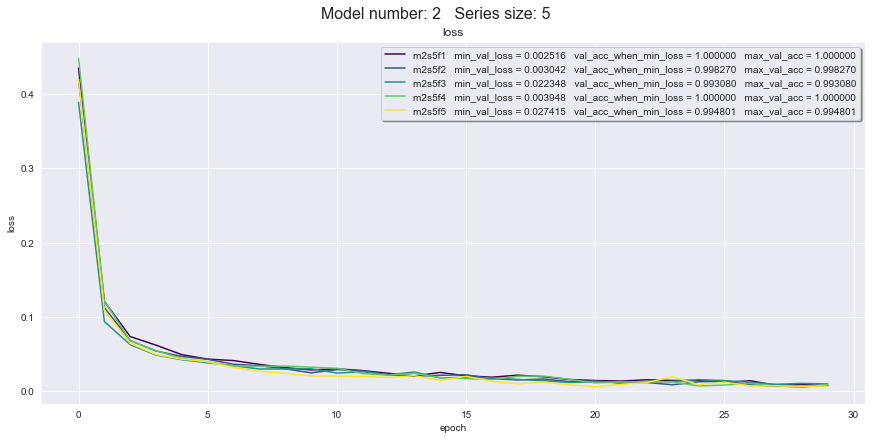

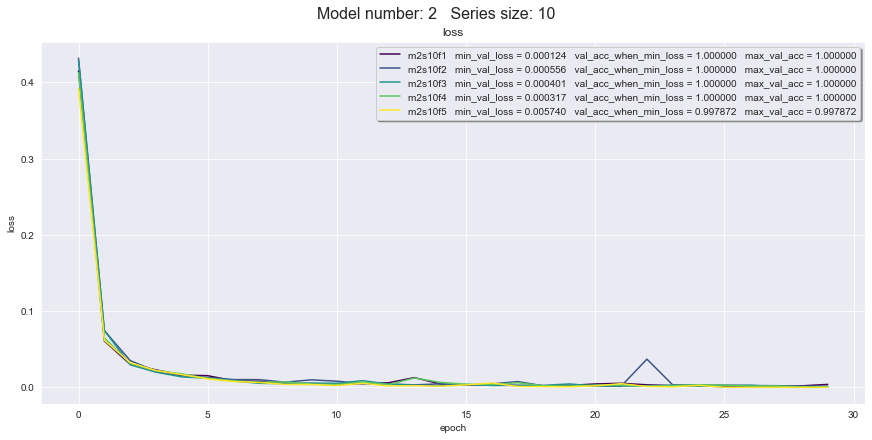

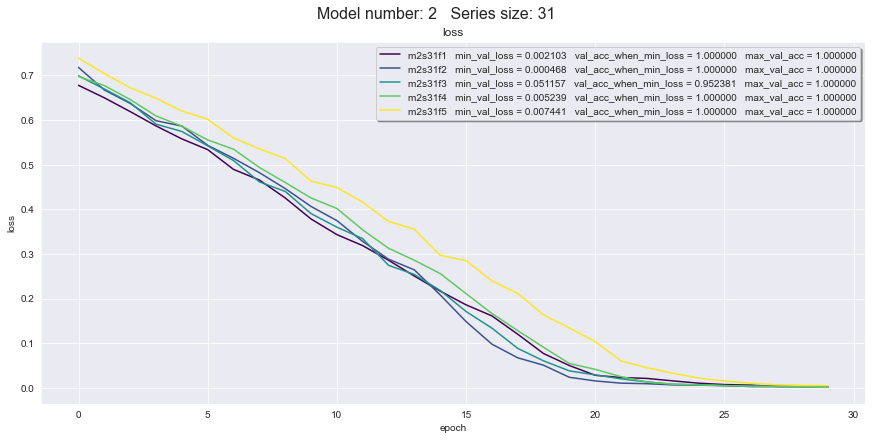

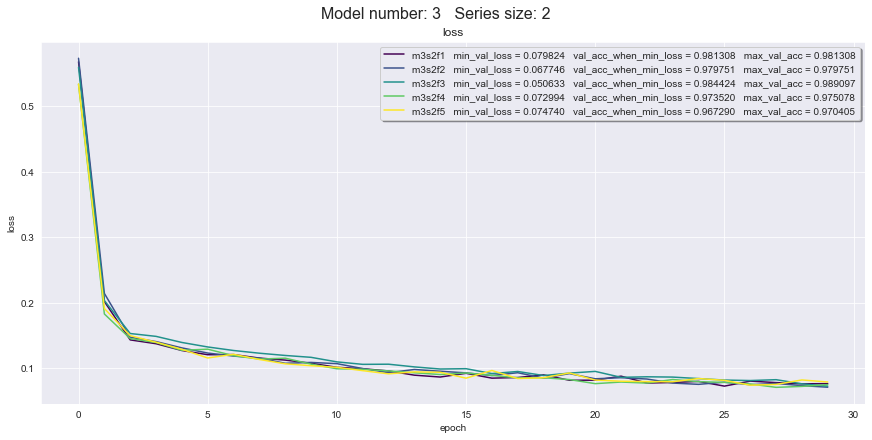

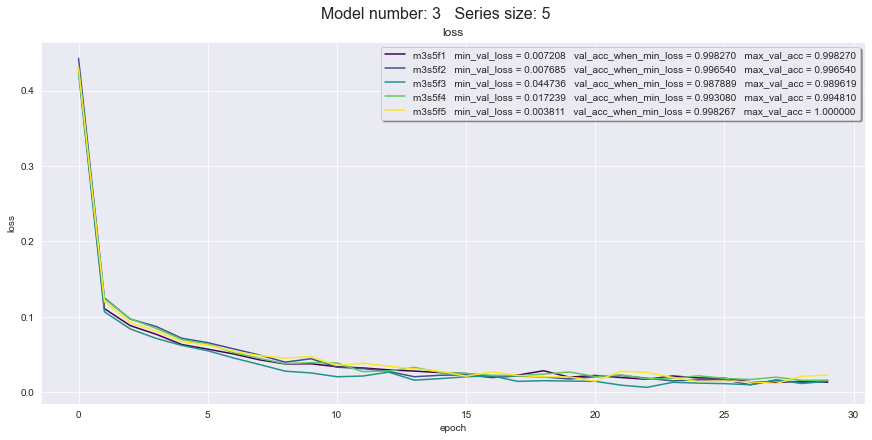

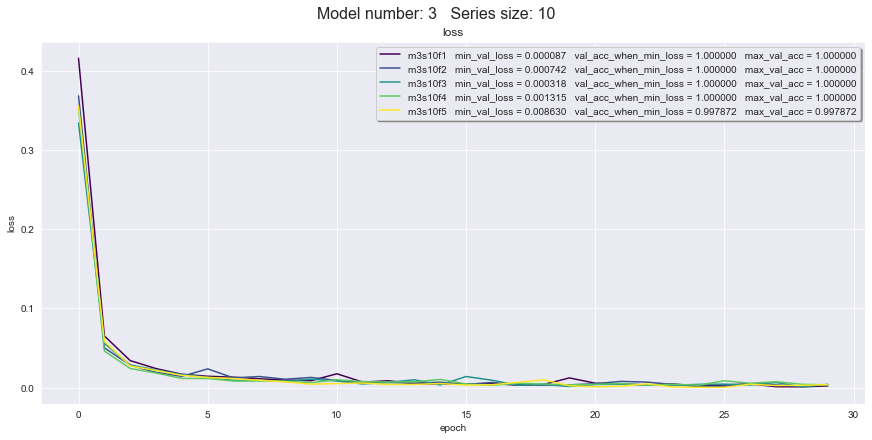

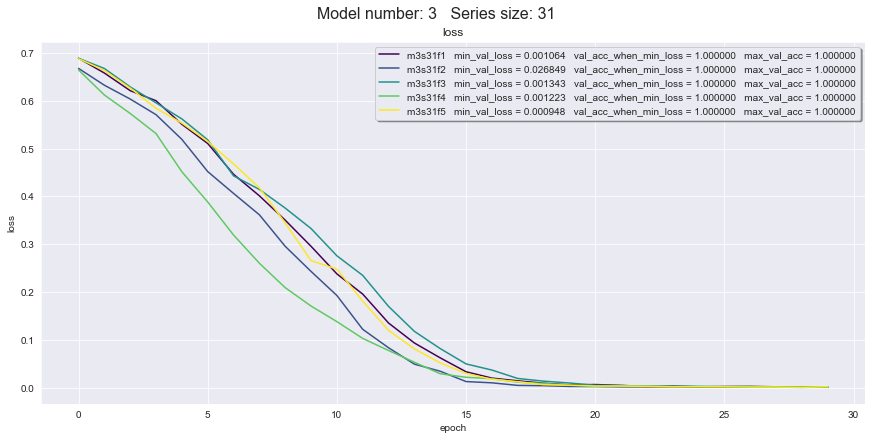

In [29]:
for i, his in enumerate(history):
    print_history_of_model(his,desc[i],title[i],'loss')

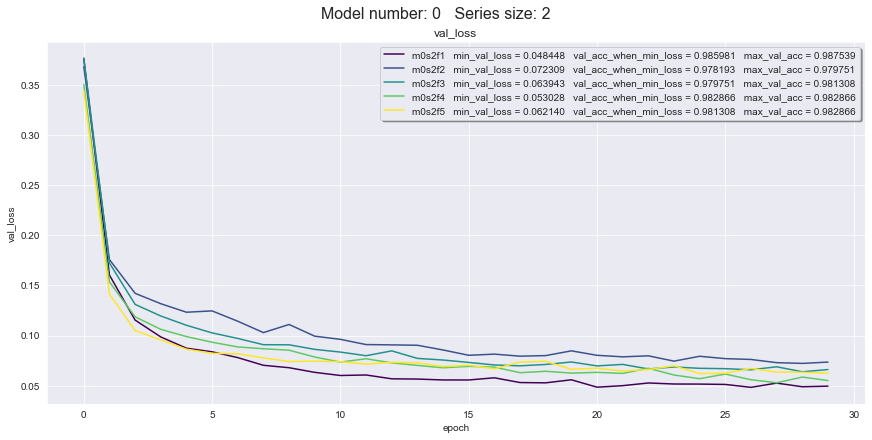

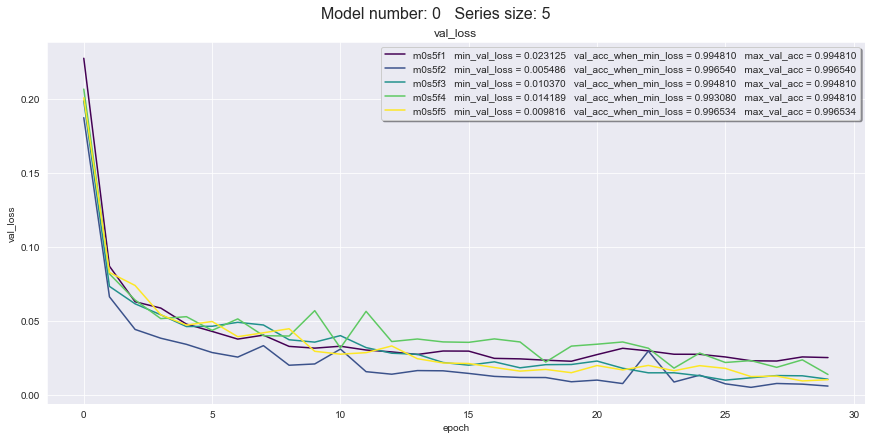

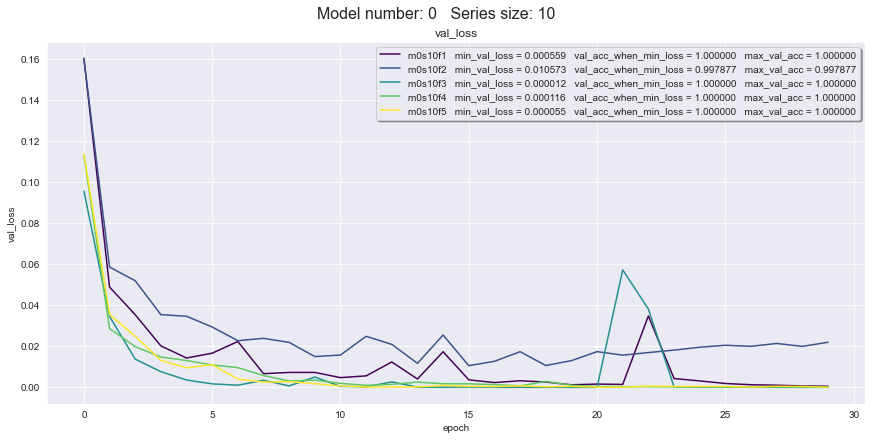

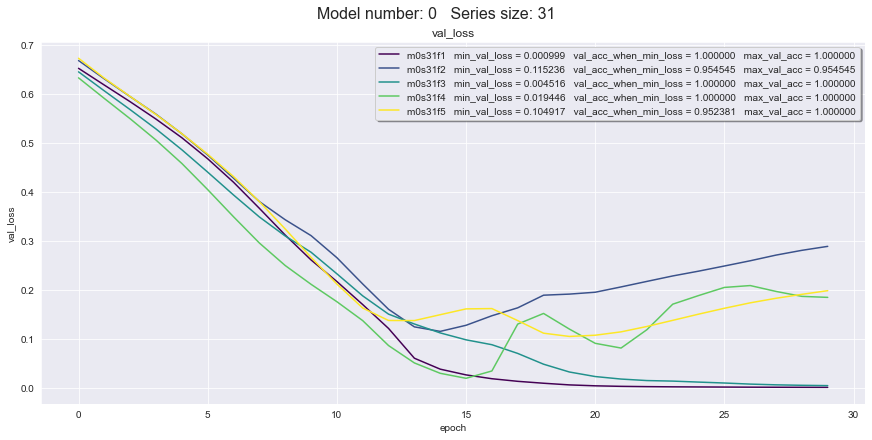

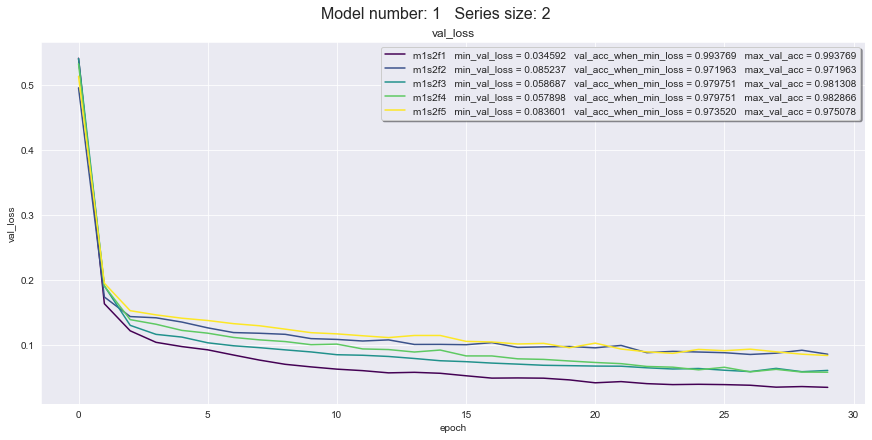

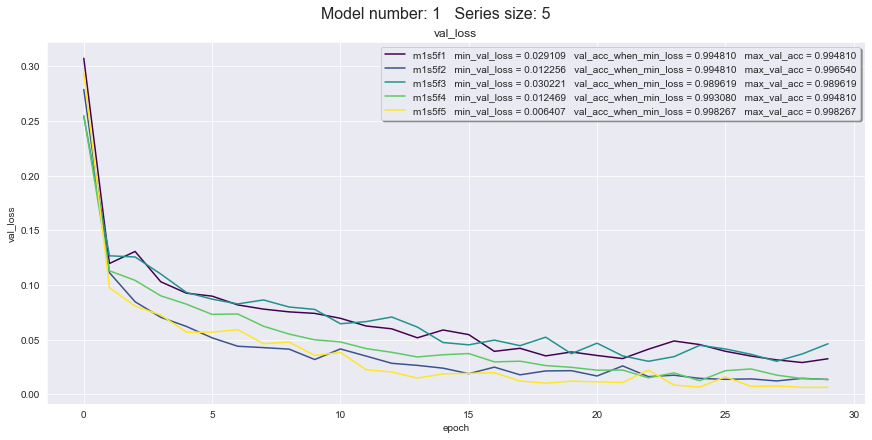

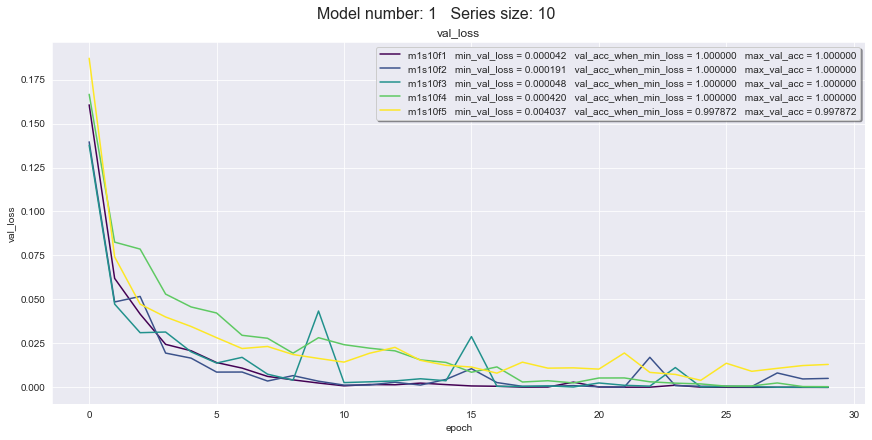

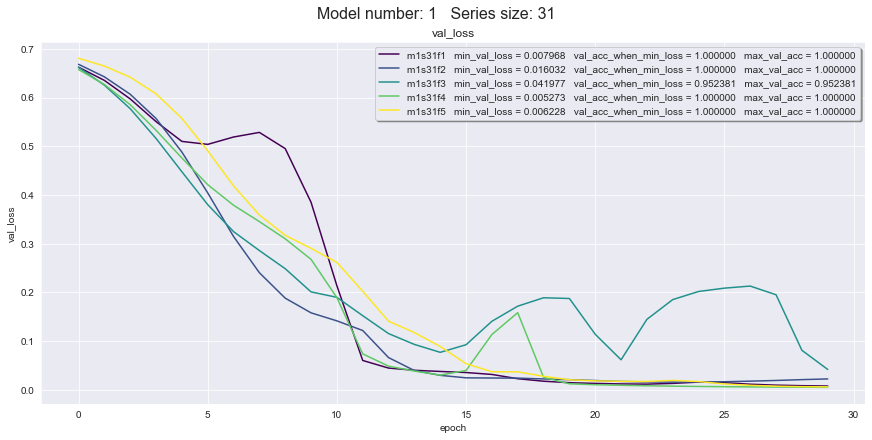

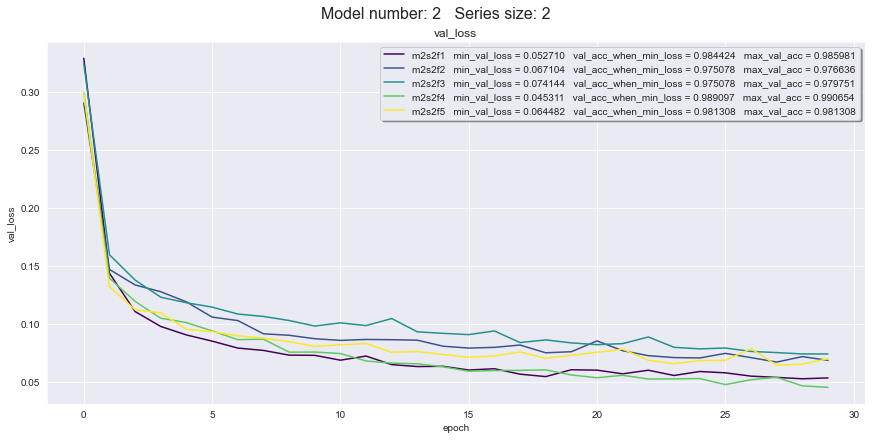

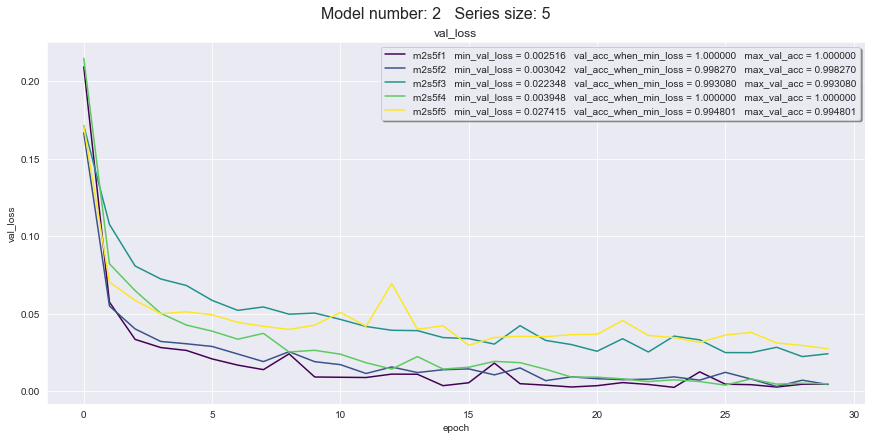

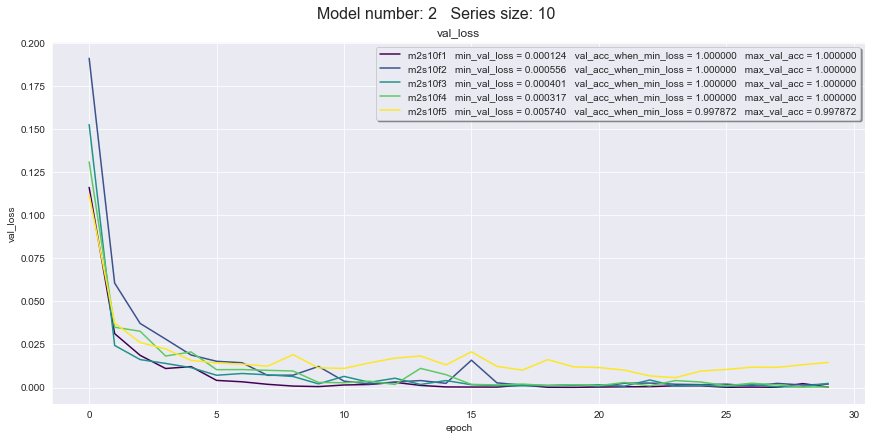

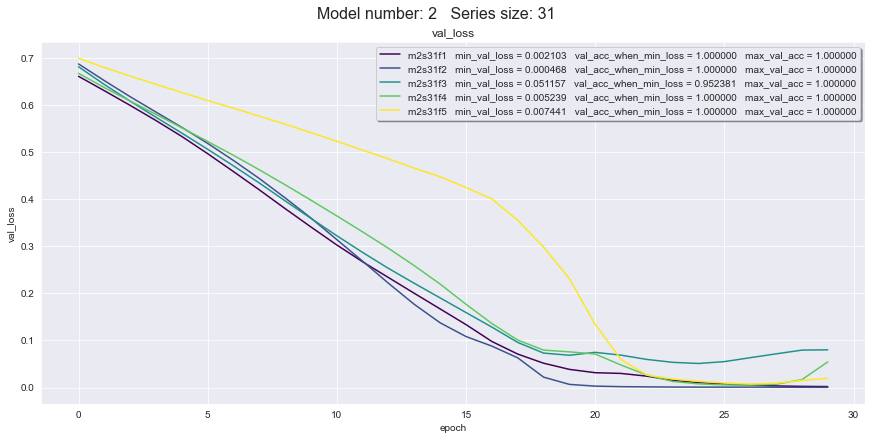

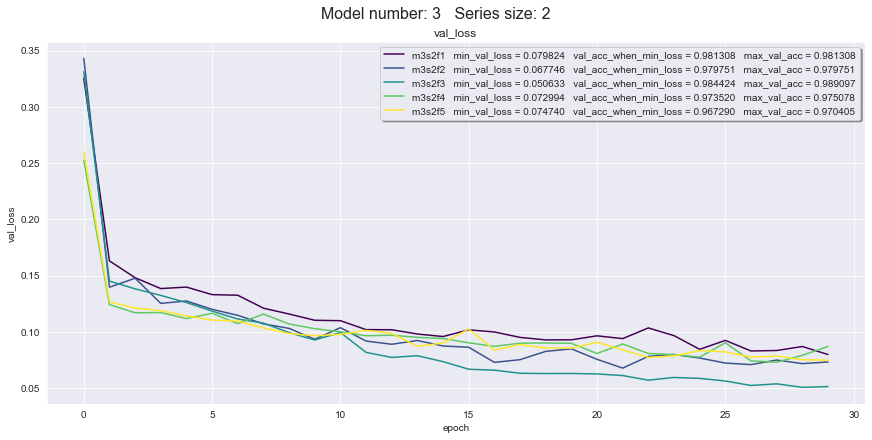

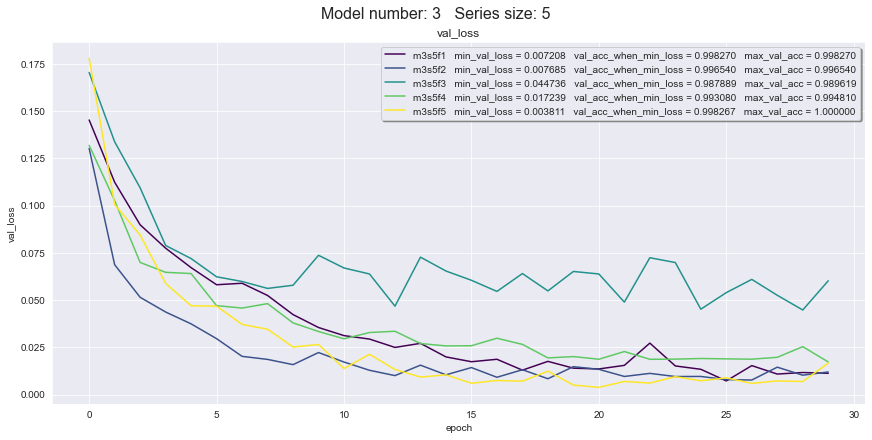

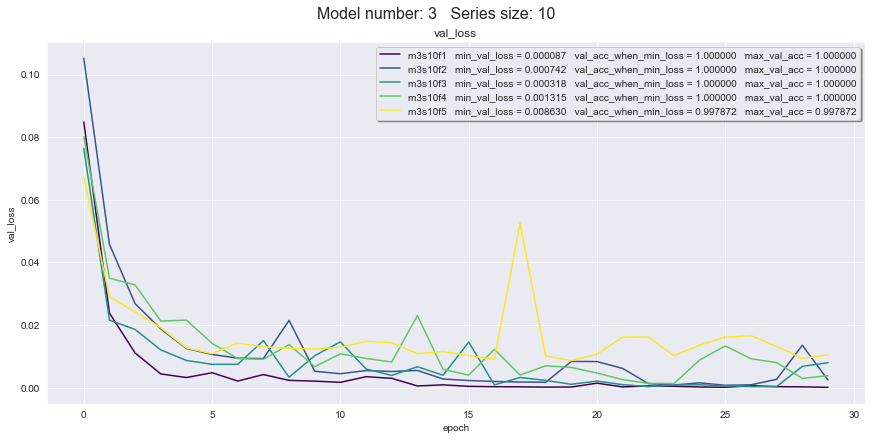

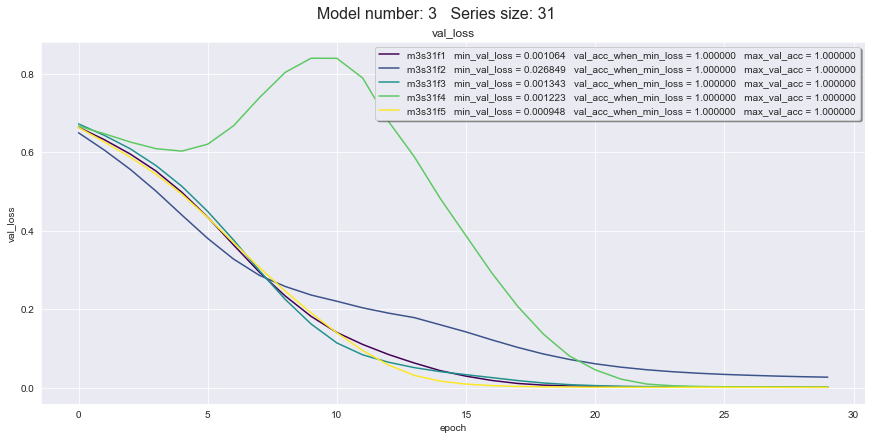

In [30]:
for i, his in enumerate(history):
    print_history_of_model(his,desc[i],title[i],'val_loss')

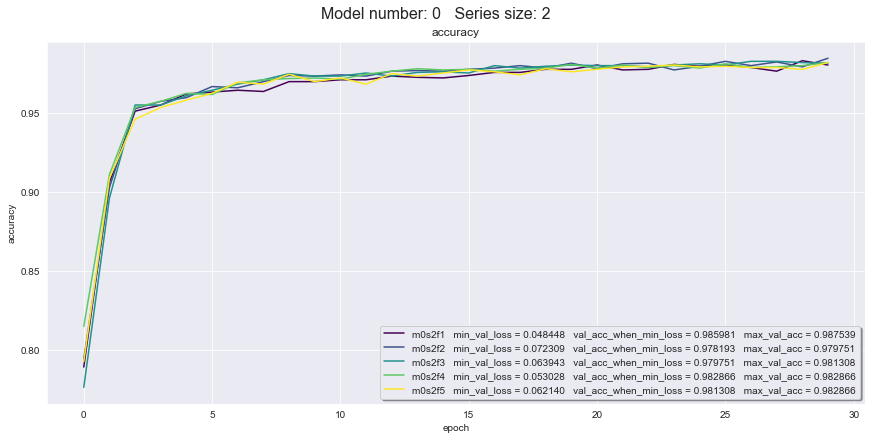

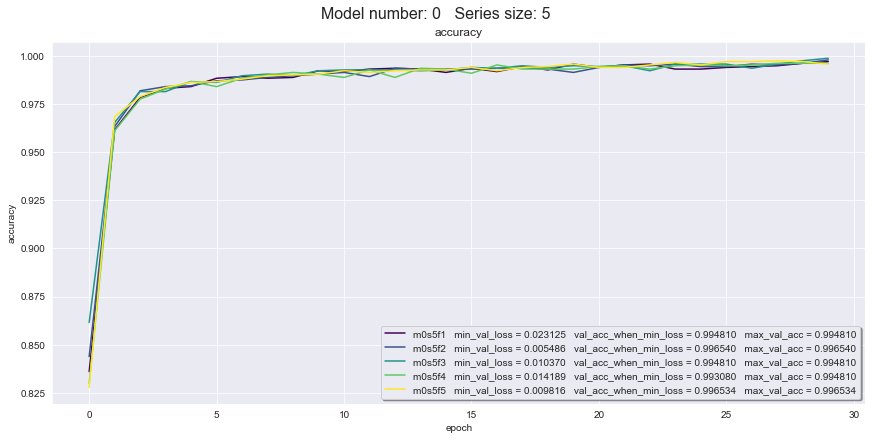

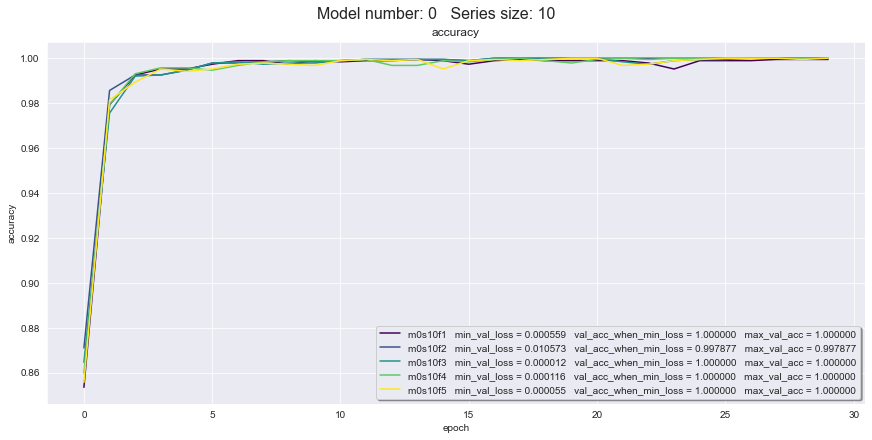

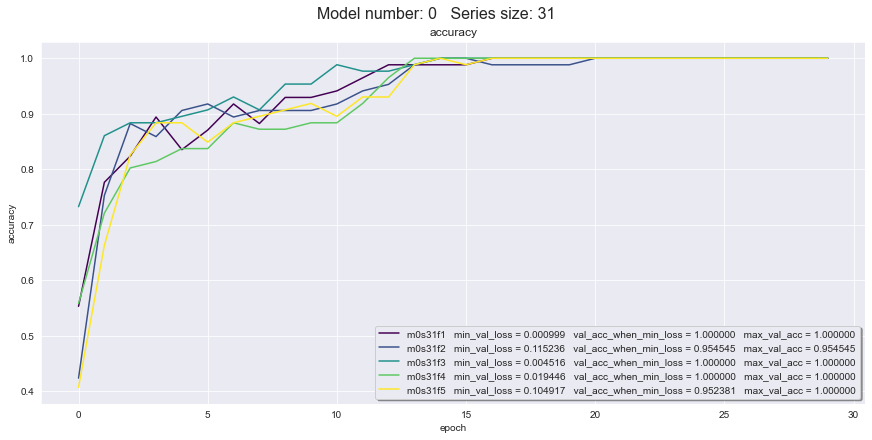

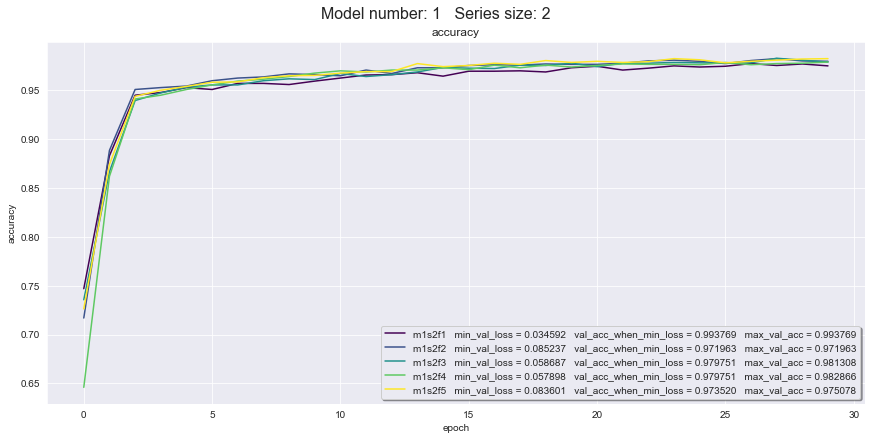

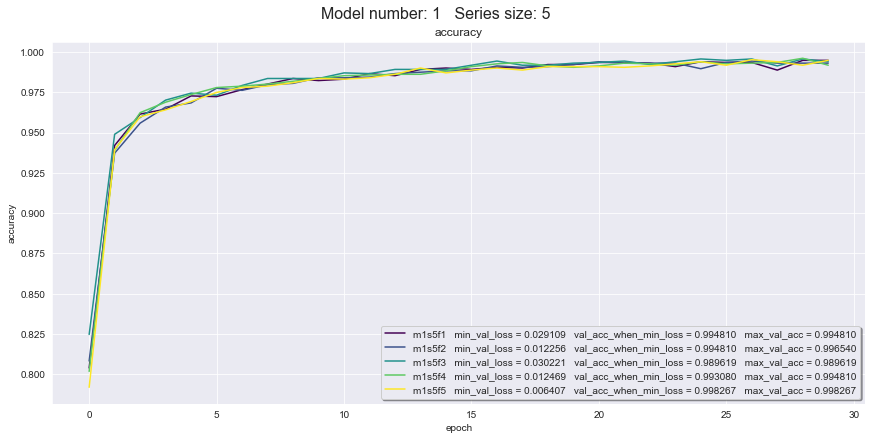

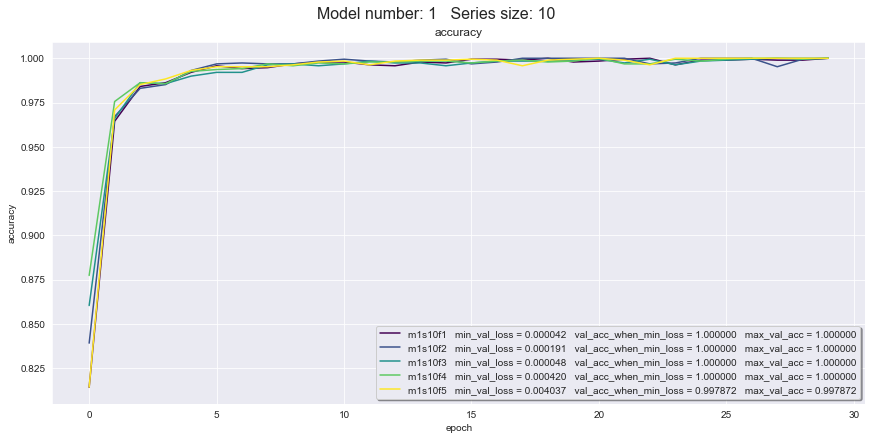

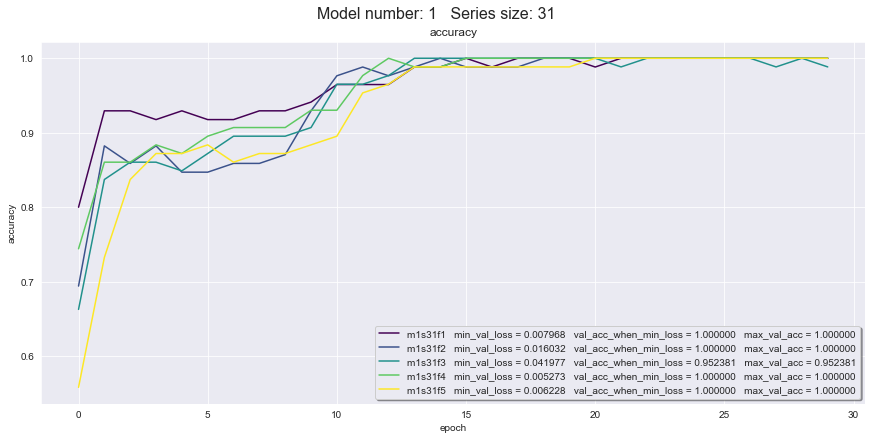

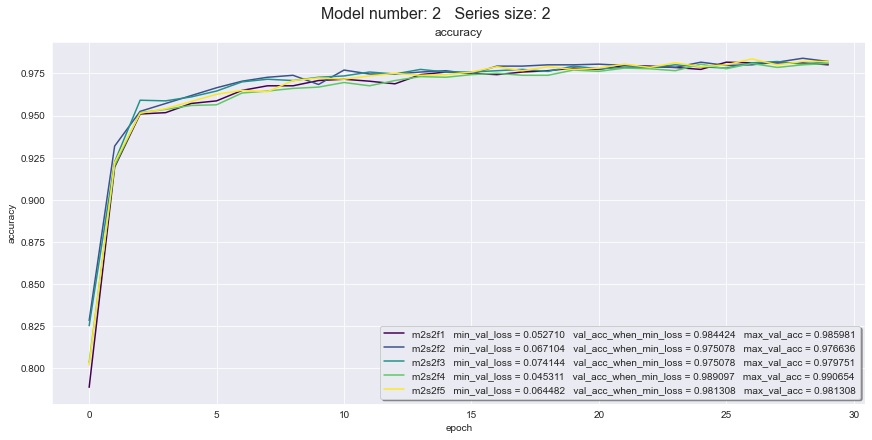

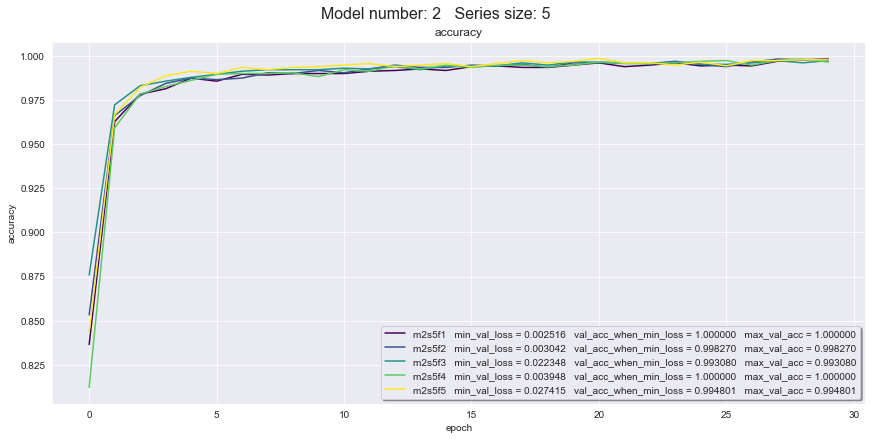

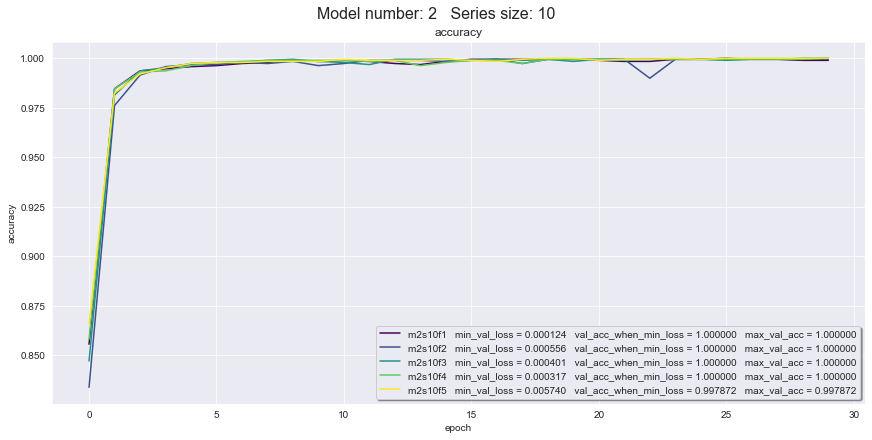

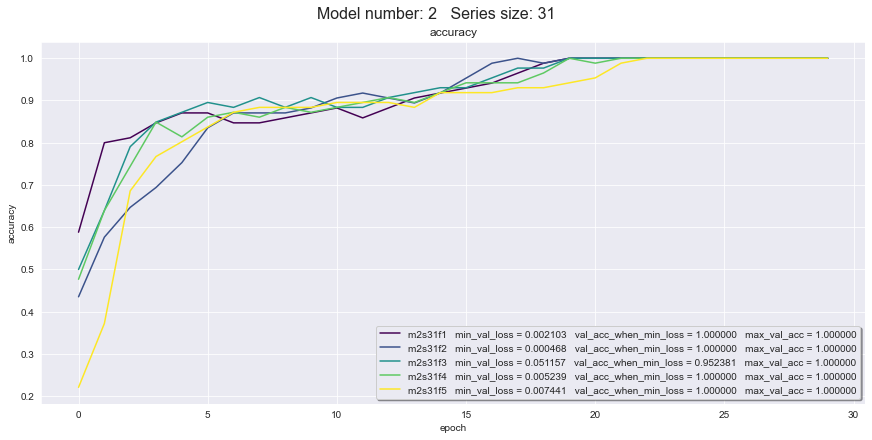

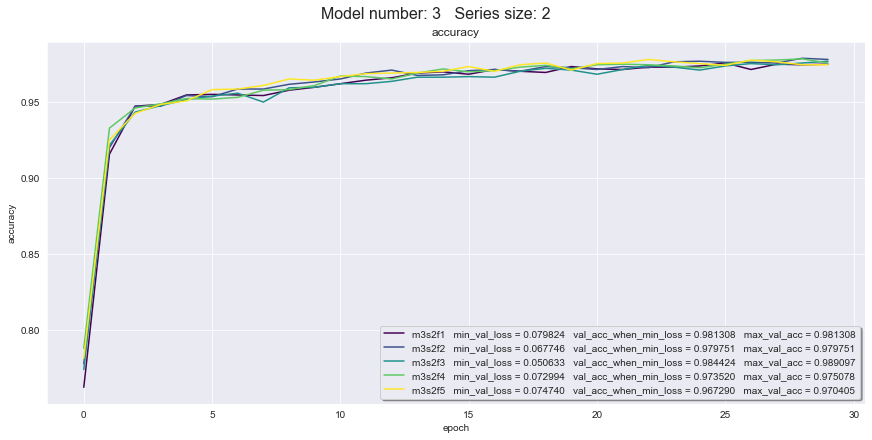

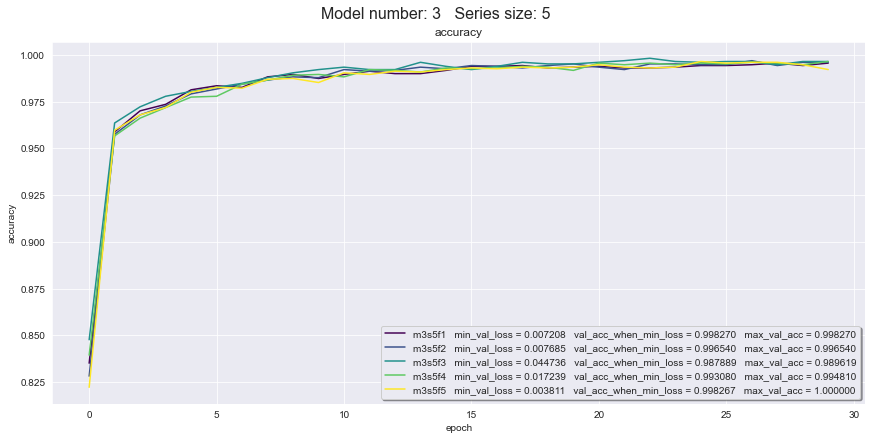

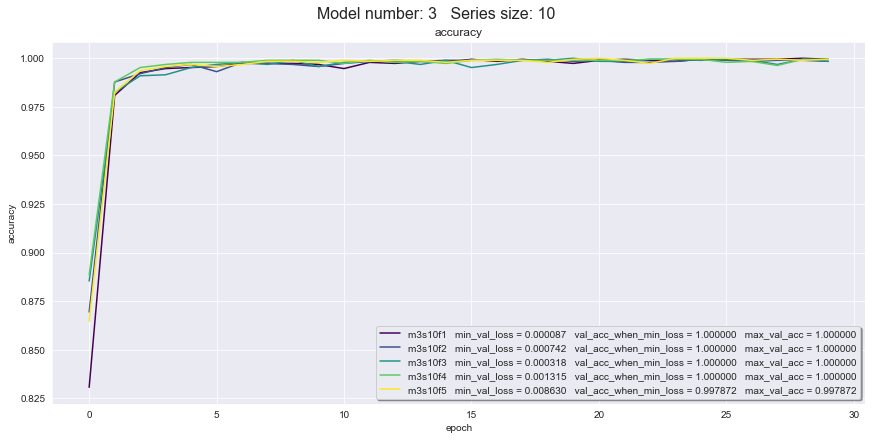

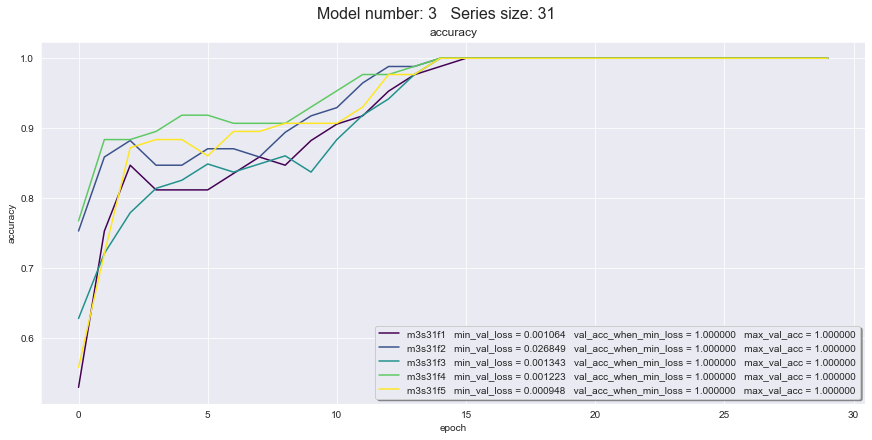

In [31]:
for i, his in enumerate(history):
    print_history_of_model(his,desc[i],title[i],'accuracy')

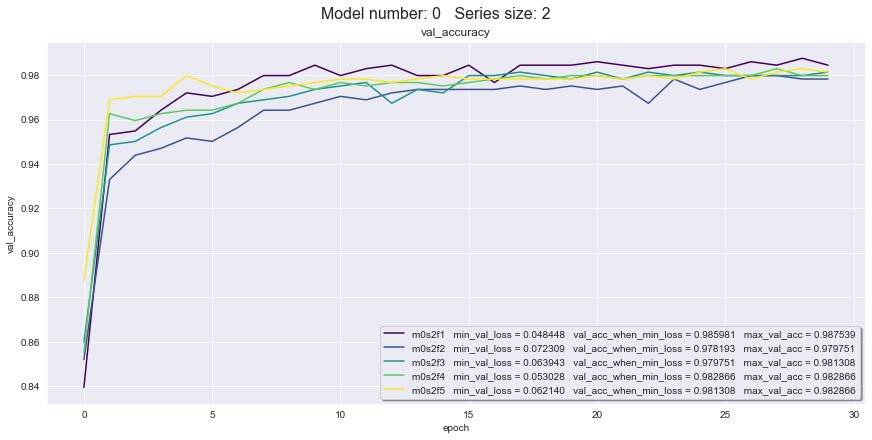

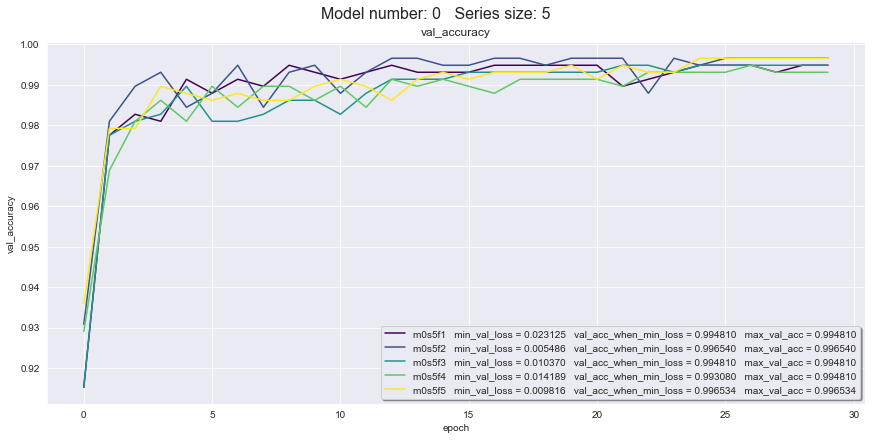

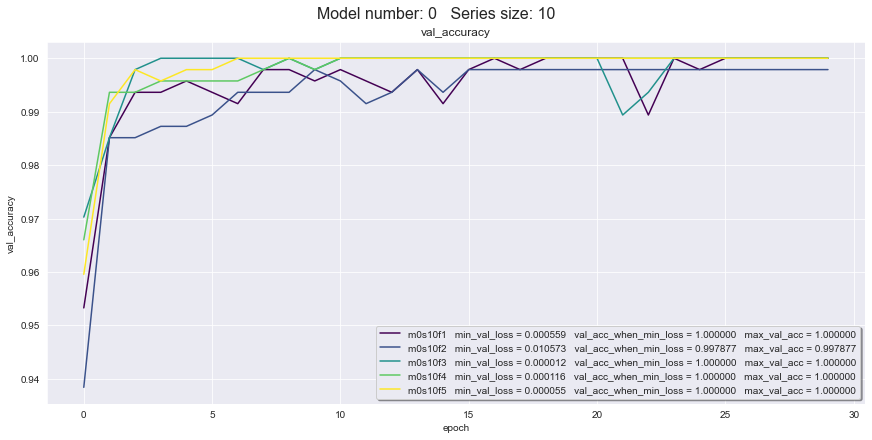

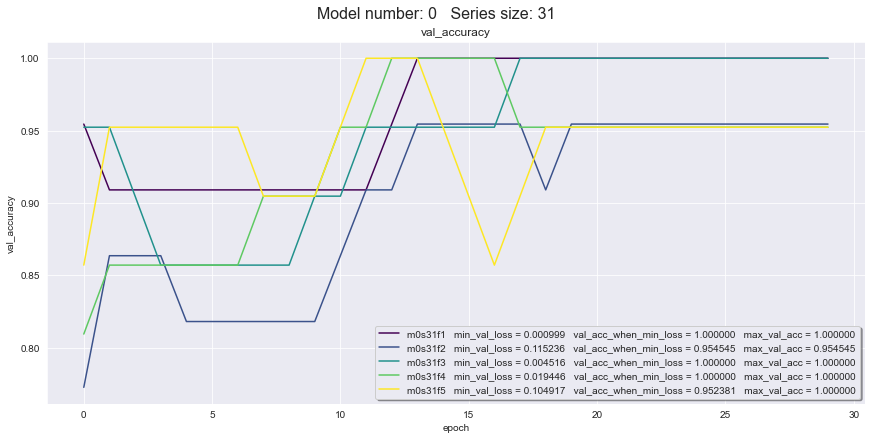

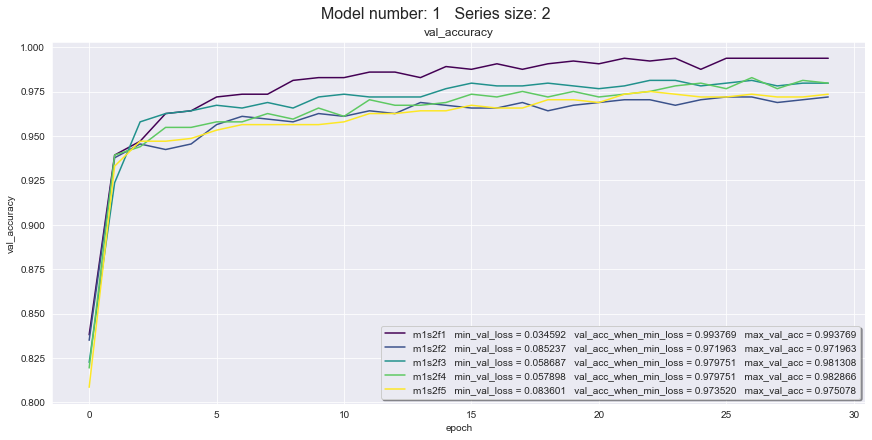

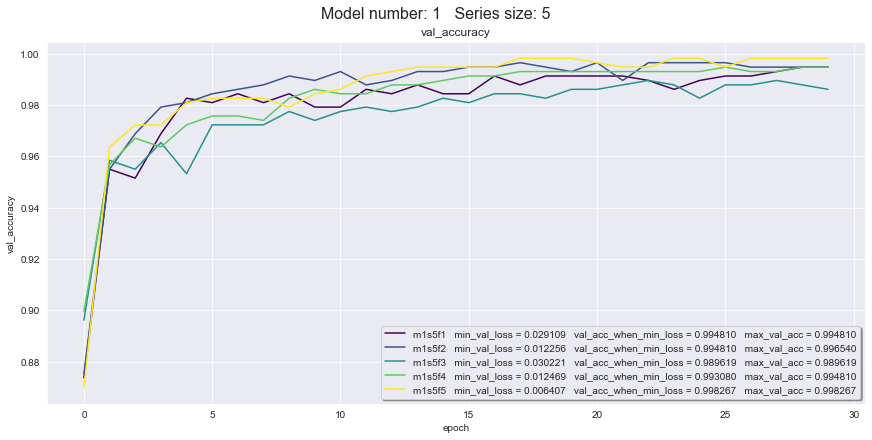

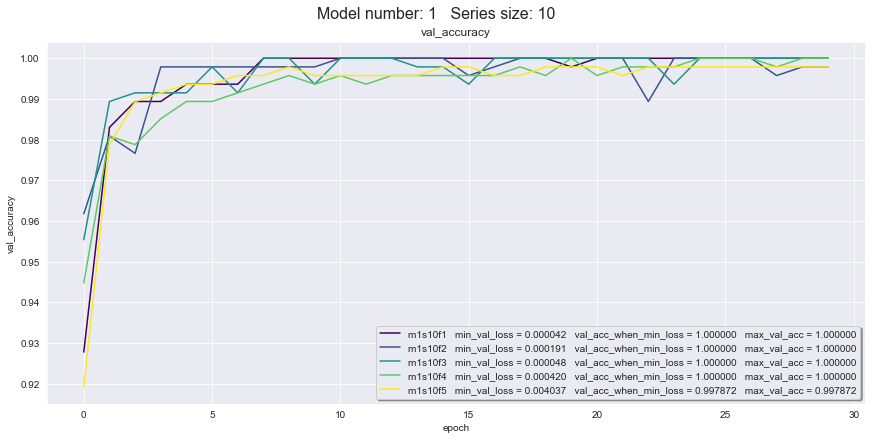

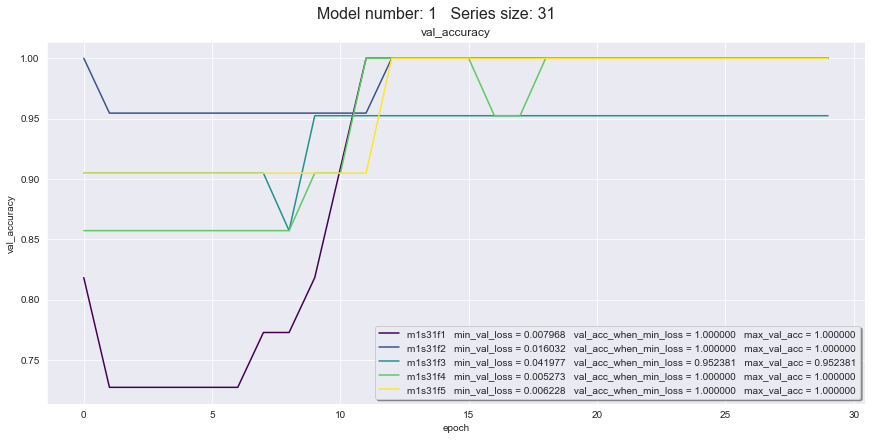

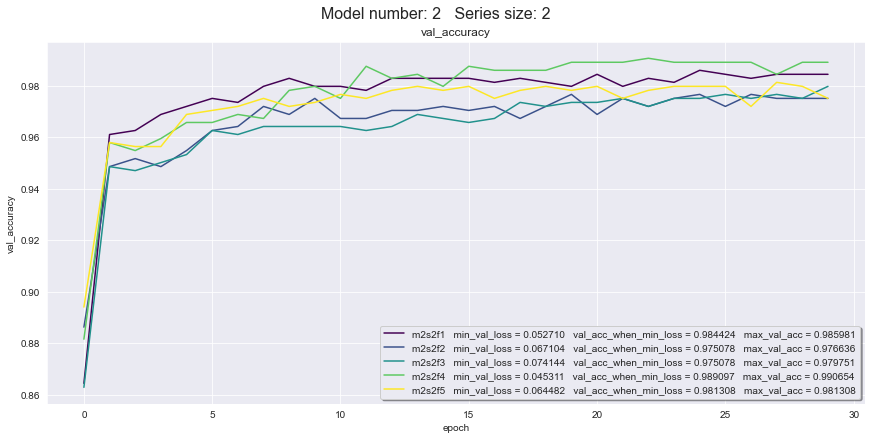

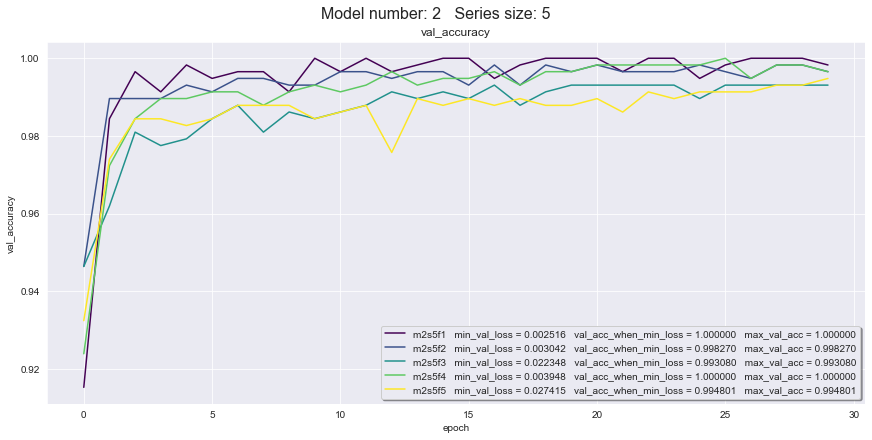

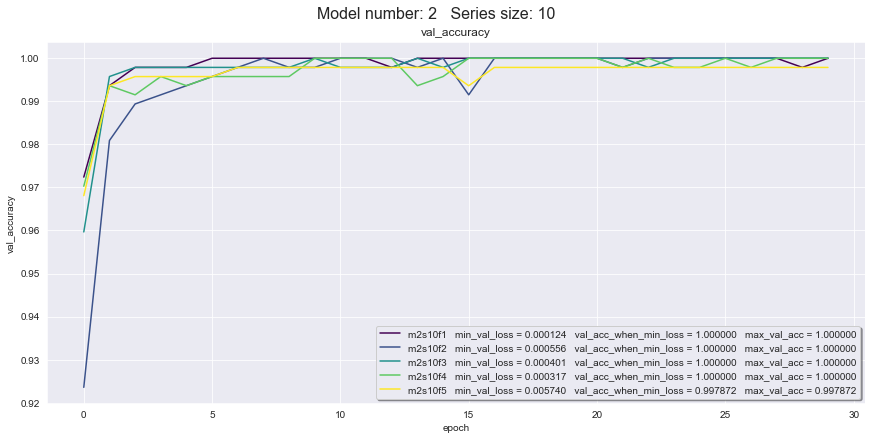

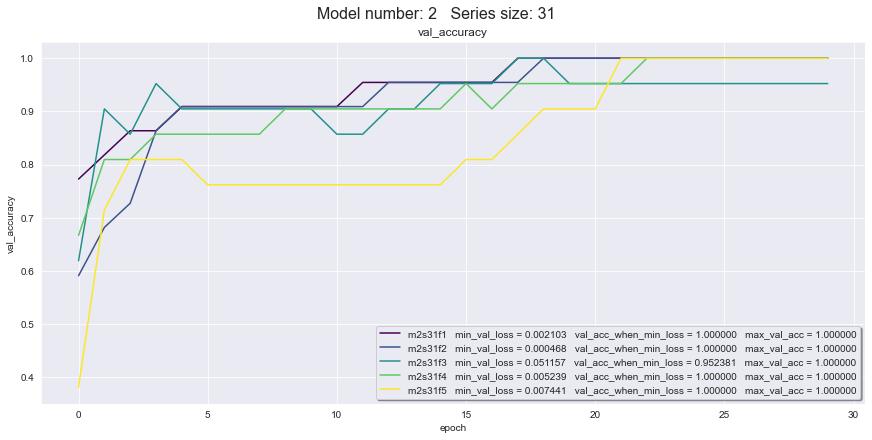

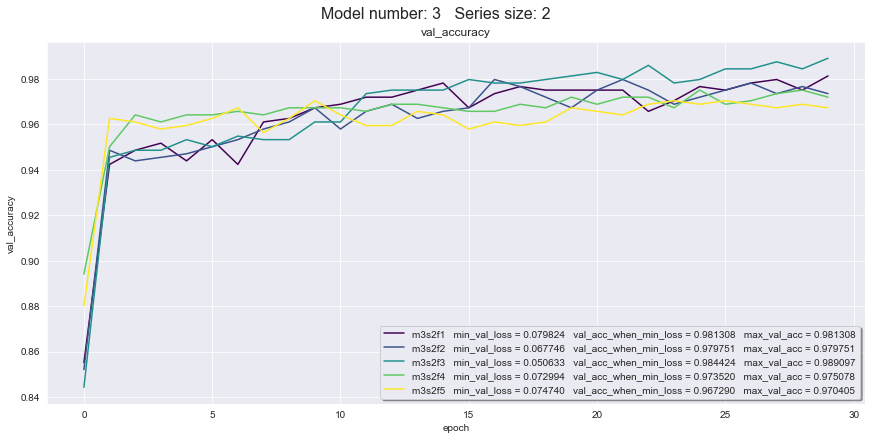

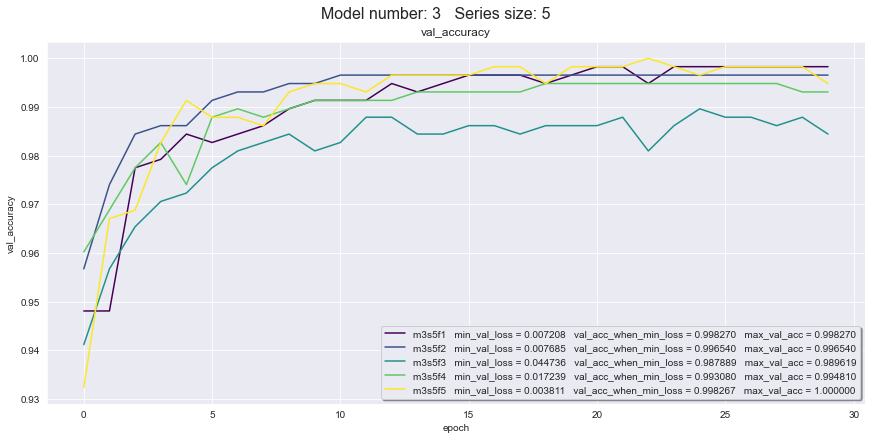

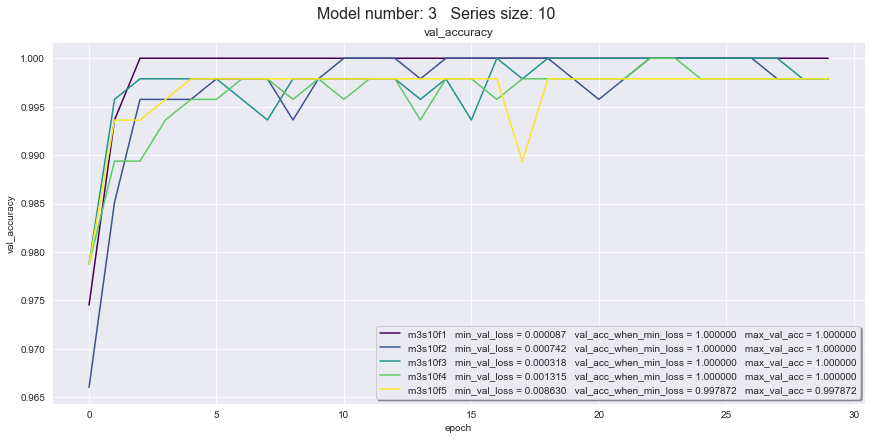

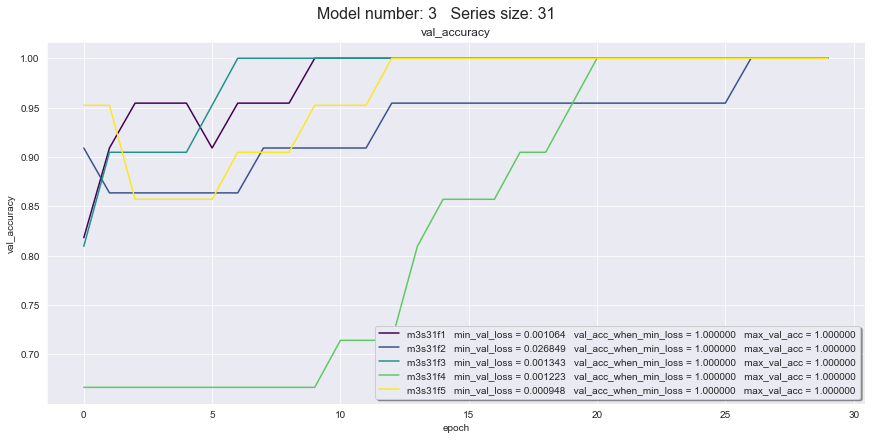

In [32]:
for i, his in enumerate(history):
    print_history_of_model(his, desc[i], title[i], 'val_accuracy')